In [1]:
import requests
import nfl_data_py as nfl
import numpy as np
import pandas as pd
import highlight_text as htext
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.patheffects as path_effects
import matplotlib.font_manager
from PIL import Image
from io import BytesIO

In [2]:
# add font family
mpl_fm = matplotlib.font_manager.fontManager.addfont(path='/home/friend/Downloads/Akzidenz-grotesk-light.ttf')
mpl_fm = matplotlib.font_manager.fontManager.addfont(path='/home/friend/Downloads/Akzidenz-grotesk-bold.ttf')
mpl_fm = matplotlib.font_manager.fontManager.addfont(path='/home/friend/Downloads/Akzidenz-grotesk-black.ttf')
mpl_fm = matplotlib.font_manager.fontManager.addfont(path='/home/friend/Downloads/Akzidenz-grotesk-roman.ttf')
mpl_fm = matplotlib.font_manager.fontManager.addfont(path='../fonts/Bebas_Neue/BebasNeue-Regular.ttf')


# confirm font family is added
# from IPython.core.display import HTML
# def make_html(fontname):
#     return "<p>{font}: <span style='font-family:{font}; font-size: 24px;'>{font}</p>".format(font=fontname)

# code = "\n".join([make_html(font) for font in sorted(set([f.name for f in matplotlib.font_manager.fontManager.ttflist]))])

# HTML("<div style='column-count: 2;'>{}</div>".format(code))

In [31]:
team = 'SF'
season = 2022
week = 4
cols = ['game_id','epa','season_type','season','week','drive','series','down','ydstogo','wp','ep','yardline_100','posteam','defteam','game_seconds_remaining']

In [32]:
df_pbp = nfl.import_pbp_data(years=[season], columns=cols, downcast=True, cache=False)

2022 done.
Downcasting floats.


In [33]:
# group by posteam, season, drive, week. sum on epa, [sum OR average (median)]? of ydstogo
df = df_pbp[cols]
groupby = ['posteam','season','week','down'] # ,'week','down'
df = df.groupby(groupby).agg({'ydstogo':'mean','epa':'mean','yardline_100':'mean','drive':'count'})
df.reset_index(inplace=True)
df

,posteam,season,week,down,ydstogo,epa,yardline_100,drive
0,ARI,2022,1,1.0,9.888889,-0.170948,53.259258,27
1,ARI,2022,1,2.0,8.333333,0.436642,55.000000,21
2,ARI,2022,1,3.0,5.750000,-0.758765,48.750000,12
3,ARI,2022,1,4.0,7.333333,0.430682,51.111111,9
4,ARI,2022,2,1.0,9.973684,0.101129,51.421051,38
...,...,...,...,...,...,...,...,...
507,WAS,2022,3,4.0,10.818182,-0.113159,58.363636,11
508,WAS,2022,4,1.0,10.000000,-0.234691,59.448277,29
509,WAS,2022,4,2.0,9.096774,-0.144720,59.258064,31
510,WAS,2022,4,3.0,11.937500,-0.260886,56.562500,16


In [34]:
df = df[((df['posteam']==team)&(df['season']==season))]
df

,posteam,season,week,down,ydstogo,epa,yardline_100,drive
448,SF,2022,1,1.0,9.785714,-0.230097,55.285713,28
449,SF,2022,1,2.0,7.869565,-0.084724,55.086956,23
450,SF,2022,1,3.0,5.526316,-0.018671,55.052631,19
451,SF,2022,1,4.0,7.750000,-0.766772,48.750000,8
452,SF,2022,2,1.0,9.151515,0.139678,49.000000,33
453,SF,2022,2,2.0,7.318182,-0.068064,44.454544,22
454,SF,2022,2,3.0,5.500000,0.303496,37.666668,18
455,SF,2022,2,4.0,3.777778,-0.194493,27.444445,9
456,SF,2022,3,1.0,10.464286,0.041582,64.750000,28
457,SF,2022,3,2.0,8.529411,-0.542489,62.235294,17


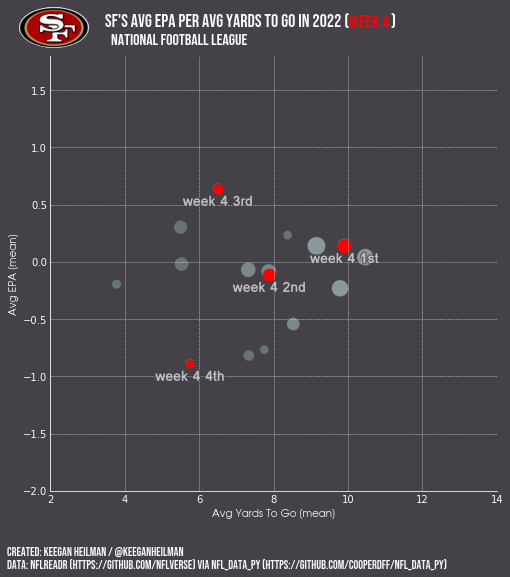

In [35]:
# adjust coloring of downs

font1 = "Mallanna"
font2 =  "Bebas Neue"
font3 = "Loma"
background = "#444148"
text_color = "#F8F9F9"
filler_color = "grey"
primary_color = "red"
first_down = "#CFF3F2"
second_down = "#B2D0CF"
third_down = "#8EA6A5"
fourth_down = "#549694"

title = "{}'s Avg EPA per Avg Yards To Go in {} (<week {}>)\n"
subtitle = "National Football League"
credits = "Created: Keegan Heilman / @keeganheilman\nData: nflreadr (https://github.com/nflverse) via nfl_data_py (https://github.com/cooperdff/nfl_data_py)"

mpl.rcParams['xtick.color'] = text_color
mpl.rcParams['ytick.color'] = text_color


fig, ax = plt.subplots(figsize=(8,8))
fig.set_facecolor(background)
ax.patch.set_facecolor(background)

ax.grid(ls="--", lw=0.5, color="lightgrey", zorder=1)

for dwn in df.down.unique():
    x = df[df.down == dwn].ydstogo.tolist()
    y = df[df.down == dwn].epa.tolist()
    size = (df[df.down == dwn]*10).drive.tolist()  
    
    dwn = int(dwn)
    if dwn == 1:
        down_color = first_down
    elif dwn == 2:
        down_color = second_down
    elif dwn == 3:
        down_color = third_down
    else:
        down_color = fourth_down
    ax.scatter(x,y,color=down_color,edgecolors=background,lw=0.5,s=size, alpha=0.5)
    
ax.scatter(x,y,s=size, color=filler_color, edgecolors=background, alpha=0.5, lw=0.5)
    
# for wk in df.week.unique():
#     x = df[df.week == wk].ydstogo.tolist()
#     y = df[df.week == wk].epa.tolist()
#     if week == wk:
#         ax.plot(x,y, color=primary_color, lw=1.5,zorder=2)
#     else:
#         ax.plot(x,y, color=filler_color, lw=1.25, alpha=0.6)
        

x = df[df.week == week].ydstogo.tolist()
y = df[df.week == week].epa.tolist()
size = (df[df.week == week]*10).drive.tolist()
t = zip(df[df.week == week].week, df[df.week == week].down)
        
for point in zip(x,y,size,t):
    ax.scatter(point[0],point[1],color=primary_color,edgecolors=background,lw=0.5,s=point[2])
    wk = point[-1][0]
    dwn = int(point[-1][1])
    if dwn == 1:
        s = "week {} {}st"
    elif dwn == 2:
        s = u"week {} {}nd"
    elif dwn == 3:
        s = "week {} {}rd"
    else:
        s = "week {} {}th"
    # t = ax.text(point[0],point[1]-0.15,s.format(point[-1][0],),alpha=0.6, color=text_color, fontweight="bold", fontfamily=font3, fontsize=14,ha="center")
    t = ax.text(point[0],point[1]-0.15,s.format(point[-1][0],int(point[-1][1])),alpha=0.6, color=text_color, fontweight="bold", fontfamily=font3, fontsize=14,ha="center")
    t.set_path_effects([path_effects.withStroke(linewidth=3, foreground=background)])

    
htext.fig_text(s=title.format(team, season, week),x=0.22, y=0.955, highlight_textprops=[{"color":primary_color,"fontweight":"bold"}], color=text_color, fontsize=18, fontweight="bold", fontfamily=font2)
fig.text(0.23,0.90, subtitle, fontweight="light", color=text_color,fontfamily=font2, fontsize=16)

ax.set_xlabel("Avg Yards To Go (mean)", fontweight="bold",color=text_color,fontfamily=font1, fontsize=14)
ax.set_ylabel("Avg EPA (mean)" ,fontweight="bold",color=text_color,fontfamily=font1, fontsize=14)

ax.set_xlim(2,14)
ax.set_ylim(-2,1.8)

ax.tick_params(axis="both",length=0)

spines = ["top", "right", "bottom", "left"]
for s in spines:
    if s in ["top","right"]:
        ax.spines[s].set_visible(False)
    else:
        ax.spines[s].set_color(text_color)

# add logo
ax2 = fig.add_axes([0.07,0.87,0.12,0.12])
ax2.axis("off")
url ='https://upload.wikimedia.org/wikipedia/commons/thumb/3/3a/San_Francisco_49ers_logo.svg/100px-San_Francisco_49ers_logo.svg.png'
response = requests.get(url)
img = Image.open(BytesIO(response.content))
ax2.imshow(img)
             

fig.text(0.05, -0.01,credits, fontstyle="italic", fontsize=12, fontfamily=font2, color=text_color)
    
# plt.tight_layout()
plt.show()
plt.close('all')